In [31]:
import numpy as np
from sklearn import datasets
#Importacion de módulo para dividir el dataset
from sklearn.model_selection import train_test_split
#Normalización de los datos
from sklearn.preprocessing import MinMaxScaler
#Importación knn
from sklearn.neighbors import KNeighborsClassifier
#Importación de matriz de confusión
from sklearn import metrics
from sklearn.metrics import confusion_matrix
#Importación grafica de matriz de confusión
import seaborn as sns
#nuevas importaciones
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.tree import export_graphviz
import graphviz

Subir y mostrar dataset

In [32]:
df = pd.read_csv("Myocardial infarction complications.csv")
df

,ID,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,77,1,2,1,1,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,...,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,...,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,1696,77,0,0,4,2,1,?,2,0,...,0,0,1,0,1,0,0,0,0,3
1696,1697,70,0,0,6,2,1,?,2,0,...,0,0,0,0,0,0,0,0,0,1
1697,1698,55,1,3,6,2,2,?,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,1699,79,0,2,2,2,1,?,2,0,...,0,0,0,1,0,0,0,0,0,1


Se elimina la variable ID, se remmplazan los datos vacíos por NaN y calcula la cantidad de datos faltantes del dataset por columna.

In [33]:
df = df.drop(['ID'], axis=1)
df.replace('?', np.nan, inplace=True)
def total_null(df):
    tot = []
    for val in df.isnull().sum():
        tot.append(val)
        cantidad_nan_columna = { k : v for k,v in zip(df.columns, tot)}

    return cantidad_nan_columna
cantidad_nan_columna =  total_null(df)
print(cantidad_nan_columna)

{'AGE': 8, 'SEX': 0, 'INF_ANAM': 4, 'STENOK_AN': 106, 'FK_STENOK': 73, 'IBS_POST': 51, 'IBS_NASL': 1628, 'GB': 9, 'SIM_GIPERT': 8, 'DLIT_AG': 248, 'ZSN_A': 54, 'nr11': 21, 'nr01': 21, 'nr02': 21, 'nr03': 21, 'nr04': 21, 'nr07': 21, 'nr08': 21, 'np01': 18, 'np04': 18, 'np05': 18, 'np07': 18, 'np08': 18, 'np09': 18, 'np10': 18, 'endocr_01': 11, 'endocr_02': 10, 'endocr_03': 10, 'zab_leg_01': 7, 'zab_leg_02': 7, 'zab_leg_03': 7, 'zab_leg_04': 7, 'zab_leg_06': 7, 'S_AD_KBRIG': 1076, 'D_AD_KBRIG': 1076, 'S_AD_ORIT': 267, 'D_AD_ORIT': 267, 'O_L_POST': 12, 'K_SH_POST': 15, 'MP_TP_POST': 14, 'SVT_POST': 12, 'GT_POST': 12, 'FIB_G_POST': 12, 'ant_im': 83, 'lat_im': 80, 'inf_im': 80, 'post_im': 72, 'IM_PG_P': 1, 'ritm_ecg_p_01': 152, 'ritm_ecg_p_02': 152, 'ritm_ecg_p_04': 152, 'ritm_ecg_p_06': 152, 'ritm_ecg_p_07': 152, 'ritm_ecg_p_08': 152, 'n_r_ecg_p_01': 115, 'n_r_ecg_p_02': 115, 'n_r_ecg_p_03': 115, 'n_r_ecg_p_04': 115, 'n_r_ecg_p_05': 115, 'n_r_ecg_p_06': 115, 'n_r_ecg_p_08': 115, 'n_r_ecg_p

Se calcula la cantidad total de datos faltantes y la cantidad de datos mímina que debería tener cada columna

In [34]:
cantidad_total_faltantes = 0
for val in cantidad_nan_columna.values():
    cantidad_total_faltantes = cantidad_total_faltantes + val
porcente_max = 1700*.3


print(f" cantidad total de datos faltantes: {cantidad_total_faltantes} cantidad maxima de perdidad por columna: {porcente_max}")

 cantidad total de datos faltantes: 15974 cantidad maxima de perdidad por columna: 510.0


Se crea una lista con las columnas a eliminar que no cumplen con la cantidad de datos por columna, luego se muestra graficamente la cantidad de datos por columna.

['IBS_NASL', 'S_AD_KBRIG', 'D_AD_KBRIG', 'KFK_BLOOD', 'NA_KB', 'NOT_NA_KB', 'LID_KB']


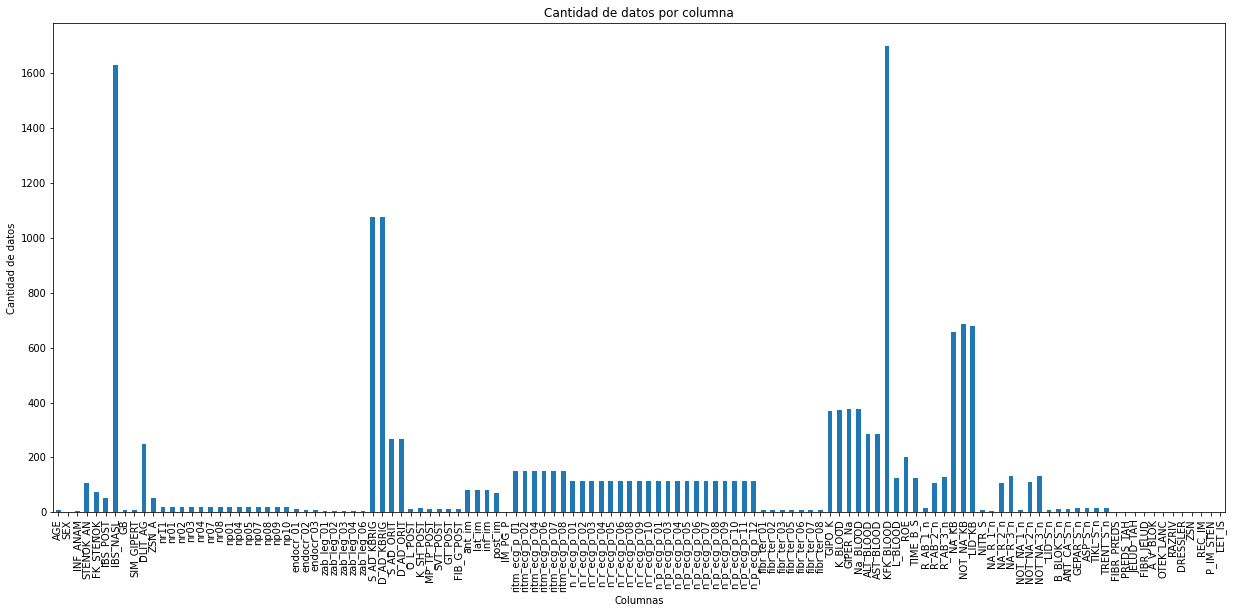

In [35]:
columnas_a_eliminar = [col for col in  cantidad_nan_columna if  cantidad_nan_columna.get(col) >= porcente_max]
print(columnas_a_eliminar)
cantidad_nan = pd.DataFrame.from_dict(cantidad_nan_columna, orient='index', columns=['count'])

# Graficamos el DataFrame
cantidad_nan.plot(kind='bar', figsize=(21, 9), legend=None)
plt.title('Cantidad de datos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de datos')
plt.show()

Se eliminan las columnas y se eliminan las filas y se completan los datos con la moda y la mediana

In [36]:
df = df.drop(columns = columnas_a_eliminar)
def getDataSet(data_set,n):
    data_set=data_set.dropna(thresh=df.shape[1]-n)
    data_set = data_set.fillna(data_set.median(numeric_only=True)) 
    categorical_cols = data_set.select_dtypes(include='object').columns.tolist()
    for col in categorical_cols:
        data_set[col].fillna(data_set[col].mode()[0], inplace=True)
    return data_set

df_29 =getDataSet(df,29)
df_35 =getDataSet(df,35)
df_29

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1694,77,0,0,0,0,0,2,0,7,0,...,0,0,0,0,1,0,0,0,0,3
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [37]:
df_35

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77,1,2,1,1,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,1,0,0,0,2,2,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,68,0,0,0,0,2,2,0,3,1,...,0,0,0,0,0,0,1,0,0,0
4,60,1,0,0,0,2,3,0,7,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,2,0,7,0,...,0,0,1,0,1,0,0,0,0,3
1696,70,0,0,6,2,1,2,0,7,0,...,0,0,0,0,0,0,0,0,0,1
1697,55,1,3,6,2,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,6
1698,79,0,2,2,2,1,2,0,7,0,...,0,0,0,1,0,0,0,0,0,1


In [38]:
df_29.info()
print('\n------------\n')
df_35.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB

------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 1699
Columns: 116 entries, AGE to LET_IS
dtypes: int64(13), object(103)
memory usage: 1.5+ MB


Se valida que ya no hay datos nulos 

In [39]:
print(total_null(df_29))
print('------------')
print(total_null(df_35))

{'AGE': 0, 'SEX': 0, 'INF_ANAM': 0, 'STENOK_AN': 0, 'FK_STENOK': 0, 'IBS_POST': 0, 'GB': 0, 'SIM_GIPERT': 0, 'DLIT_AG': 0, 'ZSN_A': 0, 'nr11': 0, 'nr01': 0, 'nr02': 0, 'nr03': 0, 'nr04': 0, 'nr07': 0, 'nr08': 0, 'np01': 0, 'np04': 0, 'np05': 0, 'np07': 0, 'np08': 0, 'np09': 0, 'np10': 0, 'endocr_01': 0, 'endocr_02': 0, 'endocr_03': 0, 'zab_leg_01': 0, 'zab_leg_02': 0, 'zab_leg_03': 0, 'zab_leg_04': 0, 'zab_leg_06': 0, 'S_AD_ORIT': 0, 'D_AD_ORIT': 0, 'O_L_POST': 0, 'K_SH_POST': 0, 'MP_TP_POST': 0, 'SVT_POST': 0, 'GT_POST': 0, 'FIB_G_POST': 0, 'ant_im': 0, 'lat_im': 0, 'inf_im': 0, 'post_im': 0, 'IM_PG_P': 0, 'ritm_ecg_p_01': 0, 'ritm_ecg_p_02': 0, 'ritm_ecg_p_04': 0, 'ritm_ecg_p_06': 0, 'ritm_ecg_p_07': 0, 'ritm_ecg_p_08': 0, 'n_r_ecg_p_01': 0, 'n_r_ecg_p_02': 0, 'n_r_ecg_p_03': 0, 'n_r_ecg_p_04': 0, 'n_r_ecg_p_05': 0, 'n_r_ecg_p_06': 0, 'n_r_ecg_p_08': 0, 'n_r_ecg_p_09': 0, 'n_r_ecg_p_10': 0, 'n_p_ecg_p_01': 0, 'n_p_ecg_p_03': 0, 'n_p_ecg_p_04': 0, 'n_p_ecg_p_05': 0, 'n_p_ecg_p_06': 0,

In [40]:
df_29.describe()

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000
mean,0.627047,0.101273,0.011522,0.024864,0.042450,0.032141,0.092784,0.032747,0.044876,0.232868,0.090964,0.084294,0.471801
std,0.483737,0.301782,0.106753,0.155756,0.201675,0.176427,0.290217,0.178028,0.207094,0.422787,0.287645,0.277912,1.377467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [41]:
df_35.describe()

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000,1691.000000
mean,0.626257,0.100532,0.011827,0.024837,0.041987,0.033708,0.094027,0.031934,0.044352,0.232407,0.094027,0.086931,0.474276
std,0.483940,0.300797,0.108140,0.155675,0.200619,0.180530,0.291953,0.175876,0.205938,0.422492,0.291953,0.281817,1.382398
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [42]:
df_numeric_29 = df_29.select_dtypes(include='number') # obteniendo las columnas con valores númericos
df_numeric_29.head(10)

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
df_numeric_35 = df_35.select_dtypes(include='number') # obteniendo las columnas con valores númericos
df_numeric_35.head(10)

,SEX,FIBR_PREDS,PREDS_TAH,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,1,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0


In [44]:
random_dataframe_29 = df_29.sample(frac = 1)
random_dataframe_35 = df_35.sample(frac = 1)

In [45]:
X_29 = random_dataframe_29.drop(["ZSN"],axis=1)
y_29 = random_dataframe_29.ZSN

X_35 = random_dataframe_35.drop(["ZSN"],axis=1)
y_35 = random_dataframe_35.ZSN

In [46]:
XTrain_29,XTest_29,yTrain_29,yTest_29 = train_test_split(X_29, y_29, test_size=0.25)
XTrain_35,XTest_35,yTrain_35,yTest_35 = train_test_split(X_35, y_35, test_size=0.25)

In [47]:
#Modelo RandomForestClassifier
modeloForest_29 = RandomForestClassifier()
modeloForest_29.fit(XTrain_29,yTrain_29)
yPredictForest_29 = modeloForest_29.predict(XTest_29)
modeloForest_35 = RandomForestClassifier()
modeloForest_35.fit(XTrain_35,yTrain_35)
yPredictForest_35 = modeloForest_35.predict(XTest_35)

In [48]:
model_scoreForest_29 = cross_val_score(modeloForest_29, XTest_29, yTest_29, scoring="accuracy",cv = 4).mean()
print("Accuracy validación cruzada: ", model_scoreForest_29)
print("Metrics Random Forest")
print("Accuracy: ", metrics.accuracy_score(yTest_29,yPredictForest_29))
print("F1Score: ", metrics.f1_score(yTest_29,yPredictForest_29))
print("Recall: ", metrics.recall_score(yTest_29,yPredictForest_29))
print("Precision: ", metrics.precision_score(yTest_29,yPredictForest_29))
print("\n--------------------------------------\n")
model_scoreForest_35 = cross_val_score(modeloForest_35, XTest_35, yTest_35, scoring="accuracy",cv = 4).mean()
print("Accuracy validación cruzada: ", model_scoreForest_35)
print("Metrics Random Forest")
print("Accuracy: ", metrics.accuracy_score(yTest_35,yPredictForest_35))
print("F1Score: ", metrics.f1_score(yTest_35,yPredictForest_35))
print("Recall: ", metrics.recall_score(yTest_35,yPredictForest_35))
print("Precision: ", metrics.precision_score(yTest_35,yPredictForest_35))

Accuracy validación cruzada:  0.7700242718446603
Metrics Random Forest
Accuracy:  0.7820823244552058
F1Score:  0.25
Recall:  0.15151515151515152
Precision:  0.7142857142857143

--------------------------------------

Accuracy validación cruzada:  0.7683737646001797
Metrics Random Forest
Accuracy:  0.8014184397163121
F1Score:  0.27586206896551724
Recall:  0.16842105263157894
Precision:  0.7619047619047619


[[308   6]
 [ 84  15]]


<AxesSubplot:>

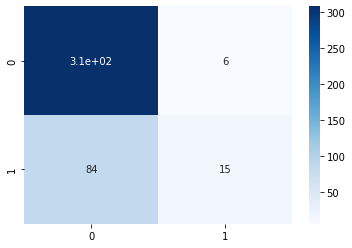

In [49]:
matrizForest_29 = confusion_matrix(yTest_29,yPredictForest_29)
print(matrizForest_29)
sns.heatmap(matrizForest_29,annot=True,cmap="Blues")

[[323   5]
 [ 79  16]]


<AxesSubplot:>

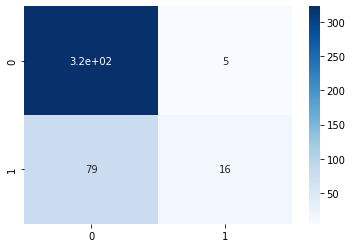

In [50]:
matrizForest_35 = confusion_matrix(yTest_35,yPredictForest_35)
print(matrizForest_35)
sns.heatmap(matrizForest_35,annot=True,cmap="Blues")

In [51]:
#Resumen de las métricas
precision_recall_fscore_support(yTest_29,yPredictForest_29, average=None)
target_names = ['No ZSN','SZN']
print(classification_report(yTest_29,yPredictForest_29, target_names=target_names))
print("\n--------------------------------------\n")
precision_recall_fscore_support(yTest_35,yPredictForest_35, average=None)
target_names = ['No ZSN','SZN']
print(classification_report(yTest_35,yPredictForest_35, target_names=target_names))


              precision    recall  f1-score   support

      No ZSN       0.79      0.98      0.87       314
         SZN       0.71      0.15      0.25        99

    accuracy                           0.78       413
   macro avg       0.75      0.57      0.56       413
weighted avg       0.77      0.78      0.72       413


--------------------------------------

              precision    recall  f1-score   support

      No ZSN       0.80      0.98      0.88       328
         SZN       0.76      0.17      0.28        95

    accuracy                           0.80       423
   macro avg       0.78      0.58      0.58       423
weighted avg       0.79      0.80      0.75       423

